# Decision Trees & Tree Ensembles

In this lesson, we will dive deep into **Decision Trees** and **Tree Ensembles**:
1. **Impurity Measures** (***Gini vs. Entropy***) and how they differ.
2. **Overfitting** in decision trees and how **Random Forests** mitigate it (***bagging*** & feature randomness).
3. Detailed code examples using **Iris** (and optional expansions) to show how each concept works.
4. **Practical considerations**: hyperparameters, bagging, feature importances.



## 1. Decision Trees: Fundamentals
A **Decision Tree** partitions the feature space into regions by **splitting** on features. Each **split** attempts to reduce "impurity" in classification tasks.

### 1.1 Impurity (Gini vs. Entropy)
- **Gini Impurity**: Measures the probability that a randomly chosen sample from the node would be mislabeled if we randomly labeled it based on distribution of classes in the node.
  $Gini = 1 - \sum_{k=1}^{C}(p_k^2)$, where $p_k$ is the fraction of class $k$ in the node, and $C$ is the number of classes.

- **Entropy**: Measures the "information content" or unpredictability of the distribution.
  $Entropy = -\sum_{k=1}^C p_k \log_2 (p_k)$.

#### Differences and Why Use Each
- Gini and Entropy are often quite similar in practice.
- **Gini** is sometimes faster to compute. It's also directly interpreted as a measure of misclassification.
- **Entropy** is from information theory, can be more interpretable in terms of information gain.
- They often yield **similar** splits. Empirical differences are usually minor.


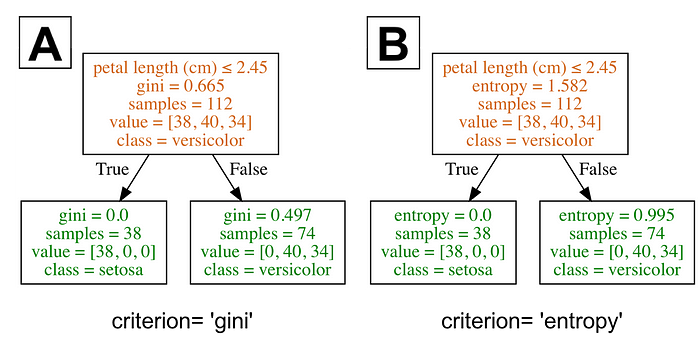
### 1.2 Building the Tree
A decision tree chooses the feature and threshold that yields the **largest decrease** in impurity. This is repeated recursively until:
1. All samples in a node are from one class (pure).
2. A stopping criterion is met (e.g., max_depth, min_samples_split).

### 1.3 Overfitting
- **Overfitting** is common when a tree becomes very deep, memorizing noise in the training data.
- We control it by limiting depth (`max_depth`), requiring a minimum number of samples in leaves, or using cost-complexity pruning.
In scikit-learn, we usually set hyperparameters like:
- `max_depth` or `min_samples_leaf`
- `min_samples_split`
- `ccp_alpha` (cost complexity pruning parameter)


## 2. Code Example: Decision Tree on Iris
We’ll illustrate a simple decision tree using scikit-learn on the Iris dataset. We'll:
1. Load **Iris**
2. Train/test split
3. Fit a `DecisionTreeClassifier`
4. Evaluate accuracy
5. Possibly visualize the tree

--- Gini, no max_depth ---
DecisionTree (gini, max_depth=None) Acc: 0.9333333333333333


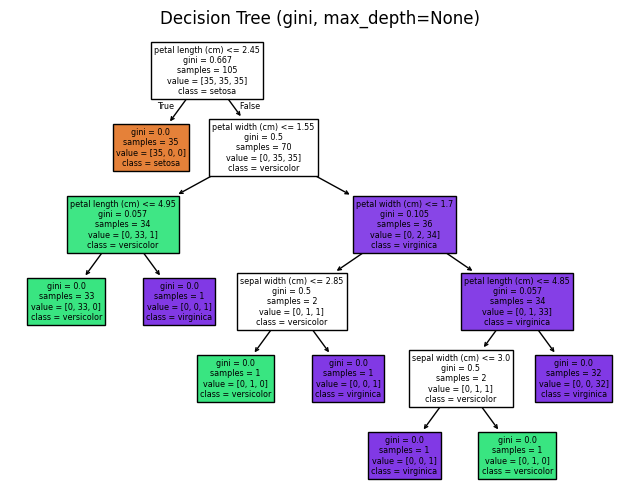


--- Entropy, no max_depth ---
DecisionTree (entropy, max_depth=None) Acc: 0.8888888888888888


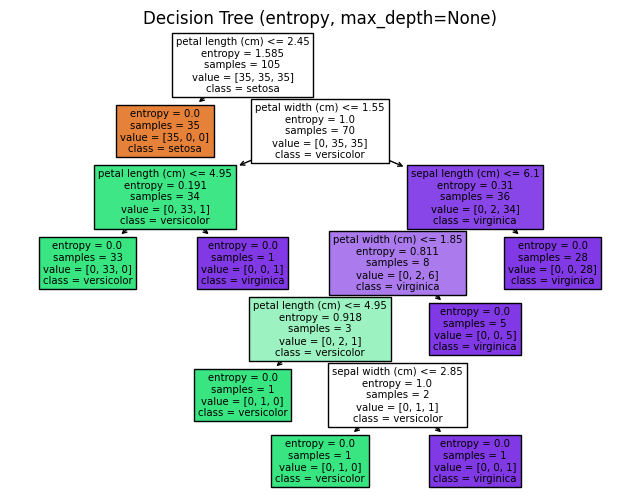


--- Gini, max_depth=3 ---
DecisionTree (gini, max_depth=3) Acc: 0.9777777777777777


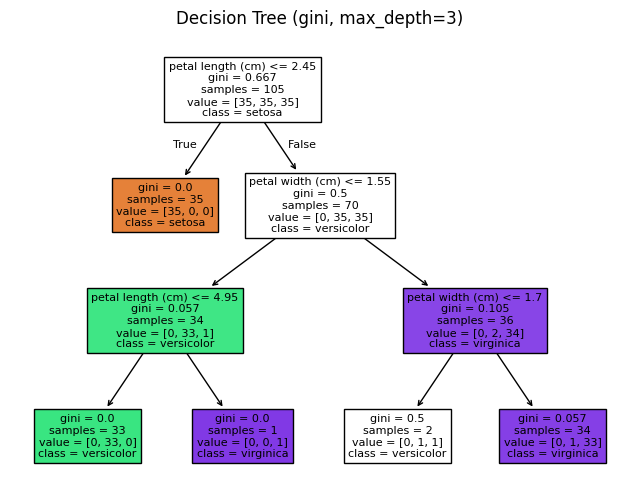

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# We'll define a function to run this.

def decision_tree_iris_example(criterion='gini', max_depth=None):
    iris = datasets.load_iris()
    X = iris.data
    y = iris.target
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y)

    clf = DecisionTreeClassifier(
        criterion=criterion,
        max_depth=max_depth,
        random_state=42
    )
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"DecisionTree ({criterion}, max_depth={max_depth}) Acc:", acc)

    # Attempt to plot the tree
    plt.figure(figsize=(8,6))
    plot_tree(clf, feature_names=iris.feature_names,
              class_names=iris.target_names, filled=True)
    plt.title(f"Decision Tree ({criterion}, max_depth={max_depth})")
    plt.show()

# Let's do a quick demonstration with Gini & Entropy
print("--- Gini, no max_depth ---")
decision_tree_iris_example(criterion='gini', max_depth=None)

print("\n--- Entropy, no max_depth ---")
decision_tree_iris_example(criterion='entropy', max_depth=None)

print("\n--- Gini, max_depth=3 ---")
decision_tree_iris_example(criterion='gini', max_depth=3)


## 3. Why Overfitting Happens, and How to Mitigate
A tree grown to **max depth** can memorize small details (noise). We handle it by:
- **Pruning**: either post-pruning (cost complexity) or setting constraints (`max_depth`, `min_samples_leaf`).
- **Early stopping**: scikit-learn does it by default with `min_impurity_decrease` or `min_samples_split`.

### Example
We can see that an unbounded tree might yield 100% train accuracy but could generalize worse. A smaller depth might have lower train accuracy but better or equal test accuracy.

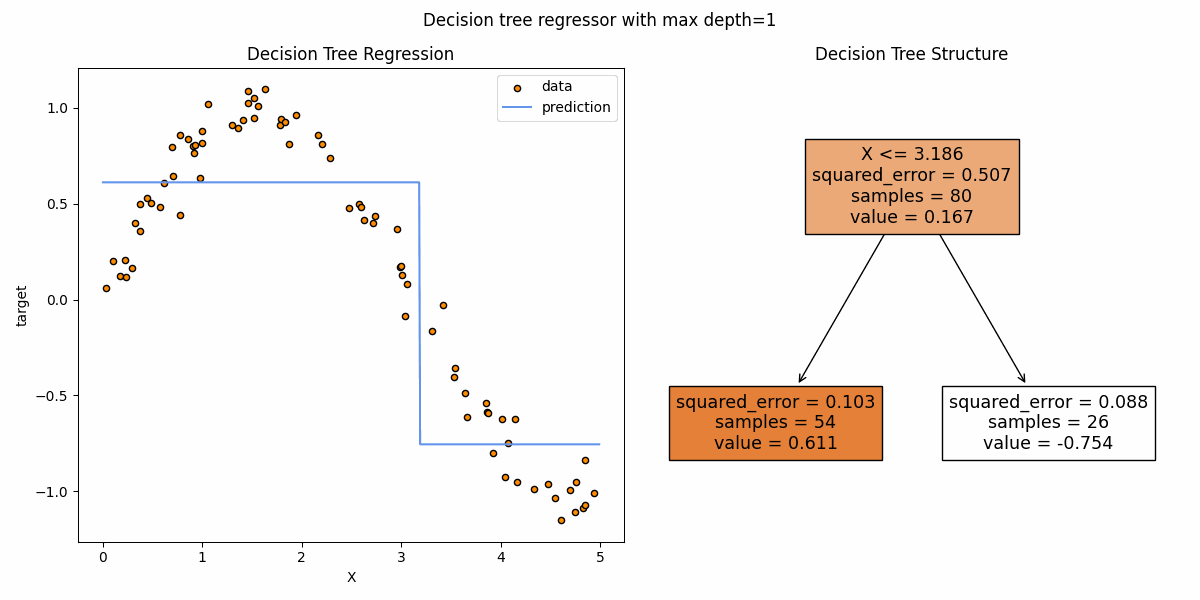

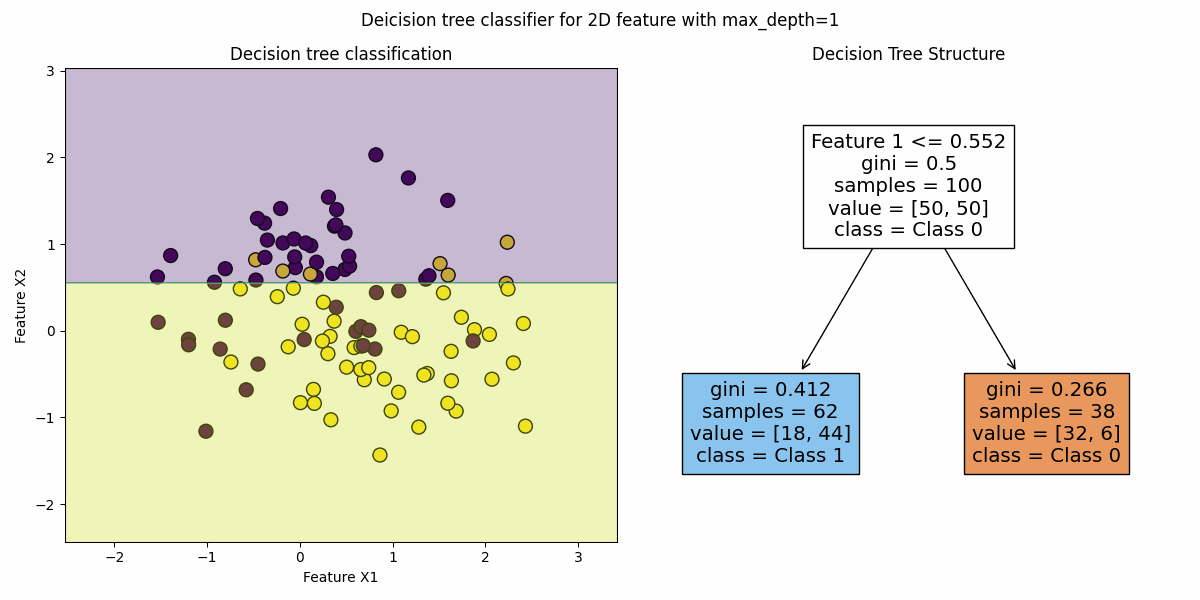

## 4. Tree Ensembles
### 4.1 Bagging
"Bagging" (Bootstrap Aggregating) is a technique to reduce variance by training multiple models on different **bootstrapped** subsets of the data, then averaging predictions.

### 4.2 Random Forest
A Random Forest is a **bag** of decision trees with two main differences:
1. Each tree trains on a **bootstrap** sample of data.
2. Each split only considers a **random subset of features**.
This randomness in data + features helps reduce correlation among trees, improving generalization.

#### Why It Solves Overfitting Better
- No single tree can memorize all data if they see different subsets.
- A random subset of features at each split prevents certain dominant features from overshadowing.
- The **aggregate** (majority vote or average) of many trees tends to have lower variance than a single deep tree.

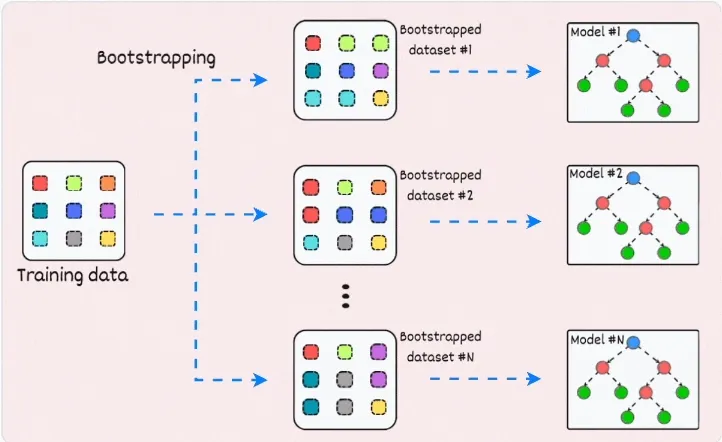

### 4.3 Code Example: RandomForest on Iris

In [ ]:
from sklearn.ensemble import RandomForestClassifier

def random_forest_iris_example():
    iris = datasets.load_iris()
    X = iris.data
    y = iris.target
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y)

    rf = RandomForestClassifier(
        n_estimators=100,
        max_depth=None,
        random_state=42
    )
    rf.fit(X_train, y_train)

    acc = rf.score(X_test, y_test)
    print("RandomForest (Iris) Accuracy:", acc)

# Let's run it
random_forest_iris_example()

RandomForest (Iris) Accuracy: 0.8888888888888888


### 4.4 Feature Importances
Random Forest calculates how much each feature reduces impurity on average across all trees. Let's show them.

In [ ]:
def random_forest_feature_importances():
    iris = datasets.load_iris()
    X = iris.data
    y = iris.target
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y)

    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    importances = rf.feature_importances_
    for name, val in zip(iris.feature_names, importances):
        print(f"{name}: {val:.3f}")
    # Evaluate
    acc = rf.score(X_test, y_test)
    print("RF Accuracy:", acc)

print("\nFeature Importances (RF on Iris):")
random_forest_feature_importances()


Feature Importances (RF on Iris):
sepal length (cm): 0.121
sepal width (cm): 0.024
petal length (cm): 0.400
petal width (cm): 0.455
RF Accuracy: 0.8888888888888888


## 5. Gradient Boosting
Another approach to forming an ensemble is **Boosting**, where new trees **sequentially** fix the errors of previous trees. The final model is an additive combination of all trees.
- Usually smaller trees (shallow depth) are used.
- We set `n_estimators`, a `learning_rate` to scale how much each tree contributes, and possibly `max_depth` to limit each tree.
Let's do a quick example with `GradientBoostingClassifier` on Iris.

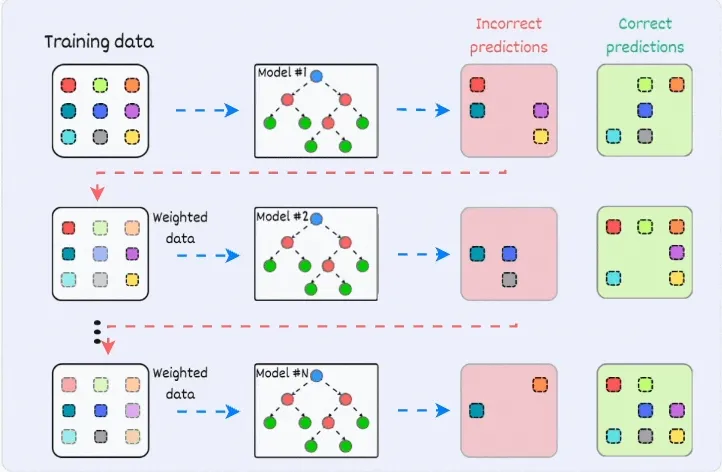

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

def gradient_boosting_iris_example():
    iris = datasets.load_iris()
    X = iris.data
    y = iris.target
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y)

    gb = GradientBoostingClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        random_state=42
    )
    gb.fit(X_train, y_train)
    acc = gb.score(X_test, y_test)
    print("GradientBoosting Accuracy (Iris):", acc)

print("\nGradient Boosting (Iris) example:")
gradient_boosting_iris_example()


Gradient Boosting (Iris) example:
GradientBoosting Accuracy (Iris): 0.9333333333333333


### Why Bagging & Boosting Solve Overfitting
 - **Bagging (Random Forest)**: Trees can overfit individually, but combining many with random subsets of data/features reduces variance.
 - **Boosting**: Each tree tries to fix leftover errors from prior trees. The final strong model often has higher accuracy but can be more prone to overfitting if `n_estimators` is huge and learning_rate is too large.

## 6. Summary
- **Decision Trees** are simple, intuitive, but can easily overfit. Tweak `max_depth`, `min_samples_leaf`, etc.
- **Impurity** can be measured by **Gini** or **Entropy** (similar results in practice). Gini is a measure of misclassification probability, Entropy from info theory.
- **Random Forest** uses bagging + random features, solving overfitting by combining many uncorrelated trees.
- **Gradient Boosting** builds trees sequentially, can achieve high accuracy but must watch out for overfitting.
- Always tune hyperparameters (like `n_estimators`, `max_depth`) for best results.

### Advanced models
**Catboost**, **XGBoost**, **LightGBM** for large-scale tasks.
